<a href="https://colab.research.google.com/github/pycroscopy/AICrystallographer/blob/master/AtomNet/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Test

**Notebook prepared by Maxim Ziatdinov**

Contact e-mail: ziatdinovmax@gmail.com

This notebook shows how to get a "cleaned" image and atomic coordinates from a noisy experimental data using a trained pytorch model. Please also refer to a GrapheneAtomFinder notebook in this repository for important details regarding this model's specifics and limitations.

To run it in Colab, first execute the cell below:

(alternatively, you can run it with a Jupyter Lab/Notebook on your local machine)

In [9]:
out = !python -c "import google.colab" 2>/dev/null; echo $?
if not int(out[0]):
    !git clone https://github.com/pycroscopy/AICrystallographer.git
    !cp -r AICrystallographer/AtomNet/* .

Import modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dcnn
from atomfind import *

Specify filepaths:

In [2]:
# Folder and filename for the saved weights
weights_folder = './saved_models/'
weights_file = 'G-Si-DFT0-1-4-best_weights.pt'

# Folder and filename for the experimental image
image_folder = 'exp_data/'
image_file = 'G-Si-2nm.npy'

Load model:

In [3]:
# Load model skeleton
model = dcnn.atomsegnet()
# Load trained weights
model = dcnn.load_torchmodel(weights_folder+weights_file, model)

Load experimental data:

In [4]:
#Load image as numpy array
imgdata = np.load(image_folder+image_file)

Apply a trained model to the experimental data and extract atomic coordinates

In [5]:
# Apply a trained model to the loaded data
img, dec = dl_image(imgdata, model).decode()
# Get atomic coordinates:
coord = find_atoms(dec).get_all_coordinates()

1 image was decoded in approximately 0.49 seconds
Atomic/defect coordinates extracted


Save the results:

In [6]:
np.save(image_folder+image_file.split('.')[0]+'-dec.npy', img)
np.save(image_folder+image_file.split('.')[0]+'-coord.npy', coord)
print('Neural network output and atomic coordinates saved to disk')

Neural network output and atomic coordinates saved to disk


Plot the results:

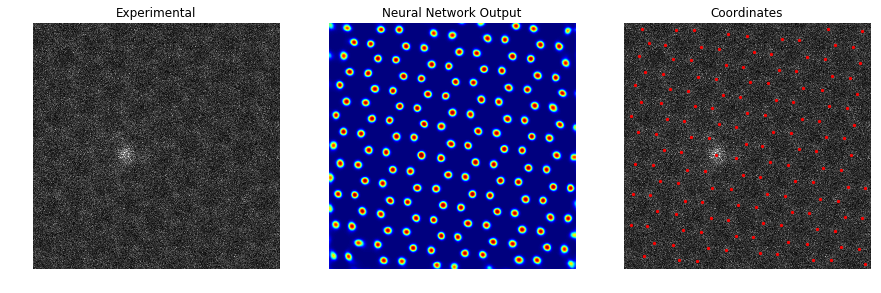

In [7]:
# Plot results ( for image stack (movie), plots the first image (frame) )
k = 0
y, x,_ = coord[0].T
fig, ax = plt.subplots(1, 3, figsize = (15, 5))
ax[0].imshow(img[k, :, :, 0], cmap='gray')
ax[0].set_title('Experimental')
ax[1].imshow(dec[k, :, :, 0], cmap='jet', Interpolation='Gaussian')
ax[1].set_title('Neural Network Output')
ax[2].imshow(img[k, :, :, 0], cmap='gray')
ax[2].scatter(x, y, s=5, c='red')
ax[2].set_title('Coordinates')
for _ax in fig.axes:
    _ax.axis('off')
plt.show()